In [1]:
using DataFrames
using DataStructures
using Plots
include("../../bayes_in_julia/ThinkStats.jl")
using .ThinkStats

In [2]:
#function pmf_from_seq(seq)
#    df=DataFrame(a=seq)
#    len=length(seq)
#    g=groupby(df, :a)
#    d=[(first(x).a, nrow(x)/len) for x in g]
#    OrderedDict(d)
#    #DataFrame(Index=[x[1] for x in d], prob=[x[2] for x in d])
#end

#function pmf_new_vals(pmf, vals)
#    OrderedDict([x for x in zip(keys(pmf), vals)])
#end

#function mult_likelihood(pmf, likelihood)
#    pmf_normalize(pmf_new_vals(pmf, values(pmf).* likelihood))
#end

#function pmf_normalize(pmf)
#    v=values(pmf)
#    pmf_new_vals(pmf, v./sum(v))
#end

#function pmf_values(pmf)
#    [x for x in values(pmf)]
#end

#function max_prob(pmf)
#    max_v=first(pmf)[1]
#    max_p=first(pmf)[2]
#    for k in keys(pmf)
#        p=pmf[k]
#        if p > max_p
#            max_v=k
#            max_p=p
#        end
#    end
#    max_v
#end

In [3]:
a=["M", "I", "S", "S", "I", "S", "S", "I", "P", "P", "I"]
letters=pmf_from_seq(a)


CatDist(["M", "I", "S", "P"], Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(4), p=[0.09090909090909091, 0.36363636363636365, 0.36363636363636365, 0.18181818181818182]))

In [4]:
pdf(letters, "S")

0.36363636363636365

In [5]:
prior=pmf_from_seq(["Bowl 1", "Bowl 2"])
prior

CatDist(["Bowl 1", "Bowl 2"], Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(2), p=[0.5, 0.5]))

In [6]:
likelihood_vanilla=[0.75, 0.5]
posterior=mult_likelihood(prior, likelihood_vanilla)

CatDist(["Bowl 1", "Bowl 2"], Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(2), p=[0.6, 0.4]))

In [7]:
posterior["Bowl 1"]

0.6

In [8]:
posterior=mult_likelihood(posterior, likelihood_vanilla)

CatDist(["Bowl 1", "Bowl 2"], Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(2), p=[0.6923076923076923, 0.30769230769230776]))

In [9]:
likelihood_chocolate = [0.25, 0.5]
posterior=mult_likelihood(posterior, likelihood_chocolate)

CatDist(["Bowl 1", "Bowl 2"], Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(2), p=[0.5294117647058822, 0.4705882352941177]))

In [26]:
hypos=0:100
prior=pmf_from_seq(hypos);

In [11]:
likelihood_vanilla=hypos./100

0.0:0.01:1.0

In [27]:
posterior1=mult_likelihood(prior, likelihood_vanilla);


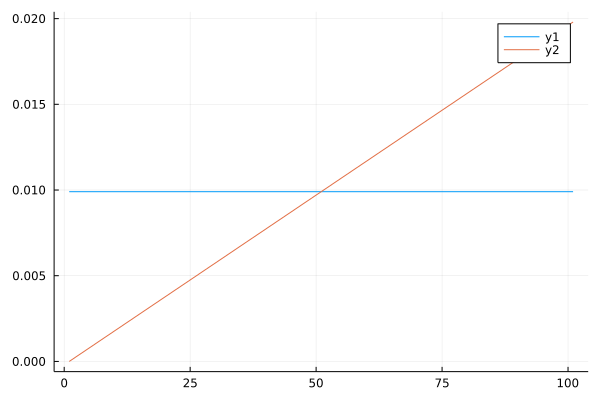

In [13]:
plot([probs(prior), probs(posterior1)])

In [25]:
posterior2=mult_likelihood(posterior1, likelihood_vanilla);

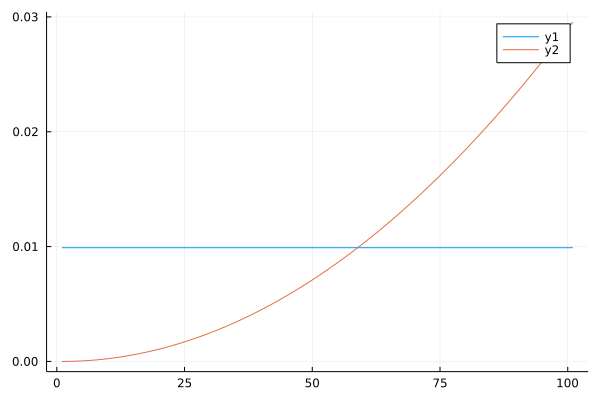

In [15]:
plot([probs(prior), probs(posterior2)])

In [16]:
likelihood_chocolate=1 .- hypos./100

1.0:-0.01:0.0

In [28]:
posterior3=mult_likelihood(posterior2, likelihood_chocolate);

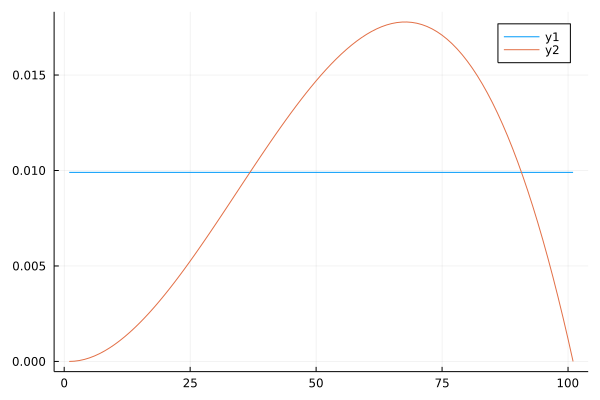

In [18]:
plot([probs(prior), probs(posterior3)])

In [19]:
max_prob(posterior3)

67

In [31]:
hypos=[6, 8, 12]
prior=pmf_from_seq(hypos)

CatDist([6, 8, 12], Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]))

In [32]:
hypos

3-element Vector{Int64}:
  6
  8
 12

In [39]:
likelihood=1 ./hypos

3-element Vector{Float64}:
 0.16666666666666666
 0.125
 0.08333333333333333

In [40]:
posterior = mult_likelihood(prior, likelihood)

CatDist([6, 8, 12], Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.4444444444444445, 0.33333333333333337, 0.22222222222222224]))

In [41]:
likelihood2=copy(likelihood)
likelihood2[1]=0
likelihood2

3-element Vector{Float64}:
 0.0
 0.125
 0.08333333333333333

In [43]:
posterior = mult_likelihood(posterior, likelihood2)

CatDist([6, 8, 12], Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.0, 0.6923076923076923, 0.30769230769230765]))

In [44]:
function update_dice(p, data)
    hypos=p.values
    likelihood=1 ./hypos
    impossible=data.>hypos
    likelihood[impossible]=0
    mult_likelihood(p, liklihood)
end

update_dice (generic function with 1 method)

In [49]:
imp=7 .>hypos

3-element BitVector:
 1
 0
 0

In [52]:
likelihood[imp].=0

1-element view(::Vector{Float64}, [1]) with eltype Float64:
 0.0